In [63]:
import numpy as np
import pandas as pd
from datetime import datetime
from data import get_indicator_data
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = get_indicator_data("AAPL")

[*********************100%***********************]  1 of 1 completed
c:\Users\Ethan\Documents\Quantico\data.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.07565670e+09 1.15050328e+09 9.51750116e+08 2.29449817e+09
 1.52437161e+09 3.62646514e+09 1.45549797e+09 8.49901604e+08
 6.28609016e+08 1.25284021e+09 4.32511125e+08 5.97272635e+08
 7.60879148e+08 7.42607083e+08 4.36053658e+08 6.09099273e+08
 1.01171253e+09 7.02115418e+08 4.62354349e+08 5.92204966e+08
 6.19994325e+08 9.43099521e+08 1.24668477e+09 8.94408513e+08
 1.05402151e+09 9.82840566e+08 1.14921864e+09 1.51272346e+09
 1.81156032e+09 1.38443838e+09 1.56694555e+09 1.27223646e+09
 2.30413460e+09 1.79192672e+09 1.40510992e+09 1.57040678e+09
 1.90832533e+09 4.46875703e+09 2.45351313e+09 2.83854037e+09
 1.55030634e+09 6.70667200e+09 1.71653685e+09 1.87863087e+09
 1.30618928e+09 4.26852280e+09 1.29595310e+09 4.45283502e+09
 1.64676806e+09 1.577685

In [24]:
# for column in df.columns:
#     plt.figure(figsize=(8, 6))
#     plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2005-05-11    1.257143    1.273929    1.182500    1.271786    1.073992   
2005-05-16    1.234286    1.275000    1.233214    1.269643    1.072182   
2005-05-26    1.426429    1.462143    1.426429    1.455000    1.228711   
2005-05-31    1.452143    1.455000    1.413571    1.420000    1.199155   
2005-06-10    1.335714    1.335714    1.268571    1.278929    1.080024   
2005-06-15    1.316786    1.332143    1.296429    1.326071    1.119834   
2005-06-20    1.351786    1.360357    1.337500    1.343214    1.134311   
2005-06-30    1.307500    1.327143    1.296786    1.314643    1.110184   
2005-07-05    1.305357    1.362500    1.303571    1.356429    1.145471   
2005-07-15    1.463214    1.484643    1.445000    1.483929    1.253141   
2005-07-20    1.530714    1.564286    1.523214    1.558214    1.315873   
2005-07-25    1.571071    1.581429    

In [42]:
df_copy = df.copy()
# Calculate the mean of the "Accum/Dist" column, ignoring NaN values
mean_accum_dist = df_copy["Accum/Dist"].mean()

# Fill NaN values with the calculated mean
df_copy["Accum/Dist"].fillna(mean_accum_dist, inplace=True)
df_copy["Accum/Dist"].isnull().sum()

# df_copy.fillna(df_copy.mean(), inplace=True)
for column in df_copy.columns:
    if column == "RSI" or column == "OBV" or column == "Accum/Dist":
        continue
    df_copy[column] = np.log(df_copy[column])
    na_vals = df_copy[column].isna().sum()
    print(f"{column} has {na_vals} missing values")

Open has 0 missing values
High has 0 missing values
Low has 0 missing values
Close has 0 missing values
Adj Close has 0 missing values
Volume has 0 missing values
EMA18 has 0 missing values
MFI has 0 missing values


C:\Users\Ethan\AppData\Local\Temp\ipykernel_28176\768184078.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["Accum/Dist"].fillna(mean_accum_dist, inplace=True)


In [43]:
df_copy

,Open,High,Low,Close,Adj Close,Volume,RSI,EMA18,OBV,MFI,Accum/Dist
Date,,,,,,,,,,,
2005-05-11,0.228842,0.242106,0.167631,0.240422,0.071382,21.437186,45.884638,0.332346,5.476604e+09,3.998011,4.166342e+08
2005-05-16,0.210493,0.242946,0.209624,0.238736,0.069696,19.977340,45.720146,0.322895,5.002309e+09,3.951402,7.693183e+08
2005-05-26,0.355174,0.379903,0.355174,0.375006,0.205966,20.079900,59.136095,0.328510,5.527830e+09,3.744331,1.084627e+09
2005-05-31,0.373040,0.375006,0.346119,0.350657,0.181617,19.817433,56.351441,0.330864,5.123625e+09,3.529375,8.058712e+08
2005-06-10,0.289466,0.289466,0.237891,0.246023,0.076983,20.336033,46.921977,0.322265,4.444692e+09,3.517910,3.364129e+08
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-03,5.416722,5.424113,5.408606,5.419074,5.419074,17.343170,62.109471,5.378622,3.141633e+10,4.110373,3.659403e+09
2024-10-08,5.412984,5.420446,5.408292,5.419517,5.419517,17.276727,62.157039,5.383006,3.144819e+10,3.997640,3.686358e+09
2024-10-18,5.464594,5.464594,5.455364,5.459586,5.459586,17.653489,66.292365,5.391349,3.149462e+10,3.976689,3.682293e+09


In [44]:
df_copy = (df_copy - df_copy.mean())/df_copy.std()
columns = ["Open", "High", "Low", "Close"]
df_copy = df_copy.loc[:, ["RSI", "EMA18", "OBV", "MFI", 'Accum/Dist']]
df_copy.head()


,RSI,EMA18,OBV,MFI,Accum/Dist
Date,,,,,
2005-05-11,-1.148045,-2.047115,-1.976548,0.021346,-1.273006
2005-05-16,-1.162761,-2.053989,-2.036423,-0.123749,-1.097270
2005-05-26,0.037480,-2.049905,-1.970081,-0.768363,-0.940156
2005-05-31,-0.211645,-2.048192,-2.021108,-1.437523,-1.079056
2005-06-10,-1.055241,-2.054447,-2.106816,-1.473214,-1.312979


In [45]:
pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(df_copy)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

In [46]:
df_pca

,PC1,PC2,PC3
0,-2.336571,-0.943681,-2.031816
1,-2.450135,-1.018902,-1.856252
2,-2.470523,-0.588391,-1.649355
3,-2.534639,-1.248513,-1.648546
4,-2.558050,-1.909996,-1.826588
...,...,...,...
976,1.893998,0.454827,0.899004
977,1.860782,0.220238,0.978336
978,1.876453,0.433881,0.968333
979,1.807180,-0.186752,1.093749


In [ ]:
type(df_copy)

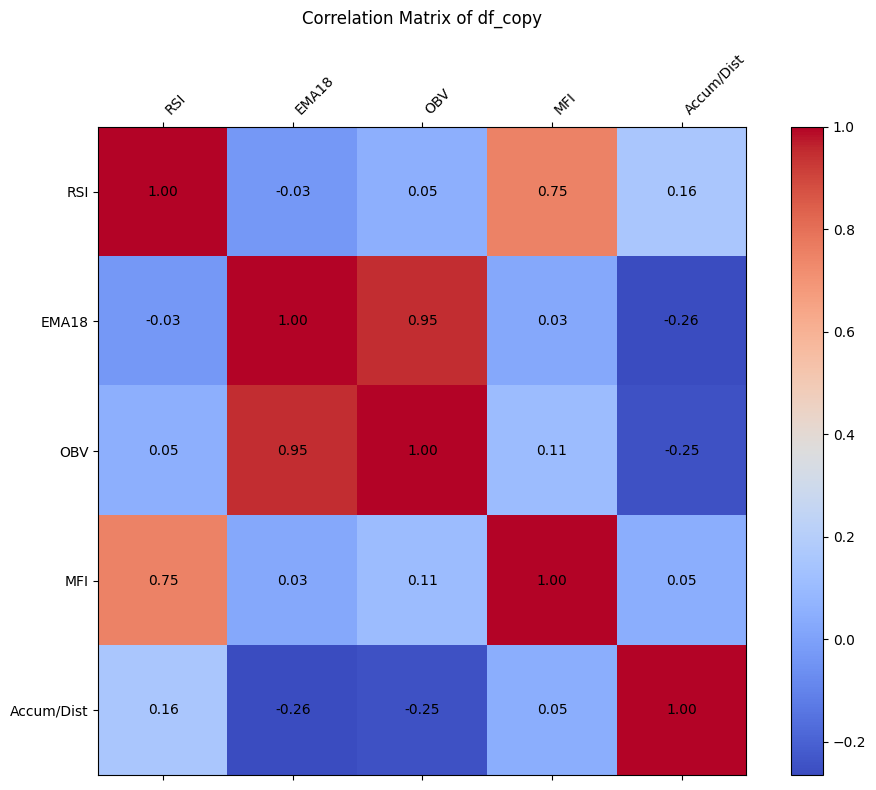

In [47]:
# Compute the correlation matrix
corr_matrix = df_copy.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Display the correlation matrix as an image
cax = ax.matshow(corr_matrix, cmap='coolwarm')

# Add color bar
fig.colorbar(cax)

# Set x and y labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='left', fontsize=10)
ax.set_yticklabels(corr_matrix.columns, fontsize=10)

# Show values in each cell
for (i, j), val in np.ndenumerate(corr_matrix.values):
    ax.text(j, i, f"{val:.2f}", ha="center", va="center", color="black")

plt.title("Correlation Matrix of df_copy", pad=20)
plt.tight_layout()
plt.show()

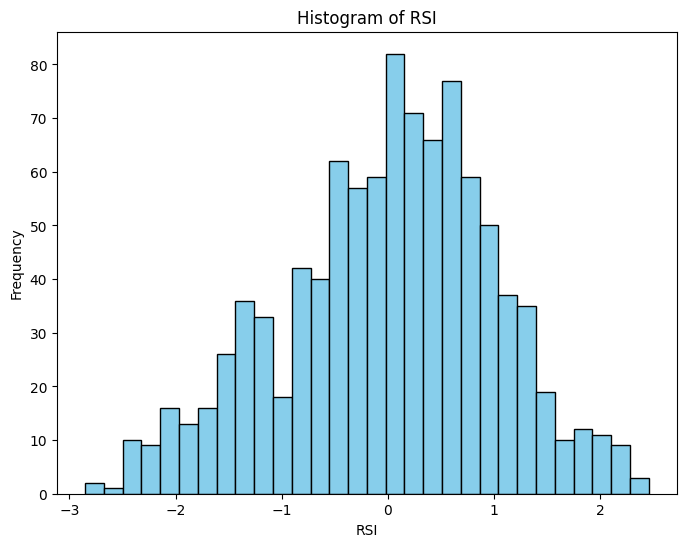

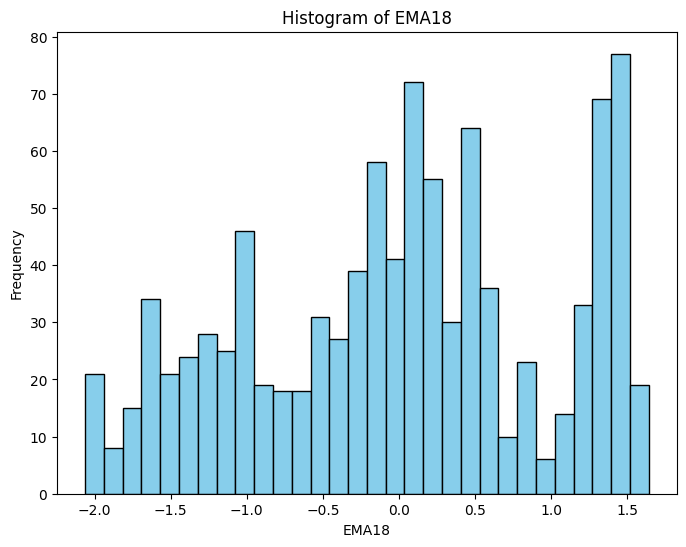

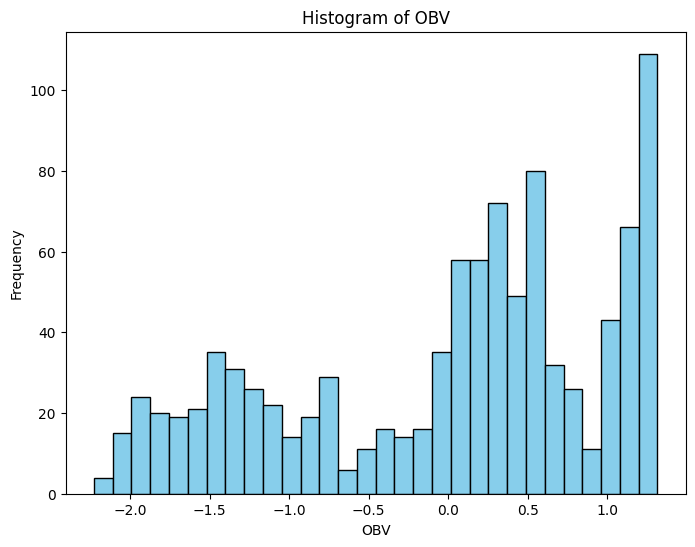

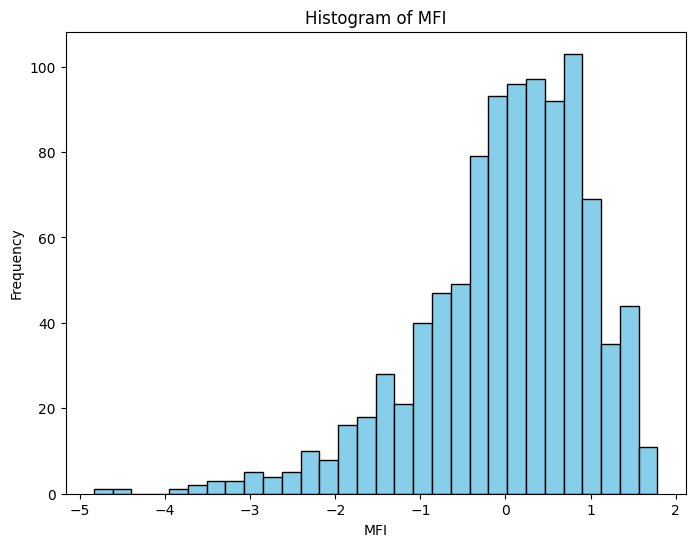

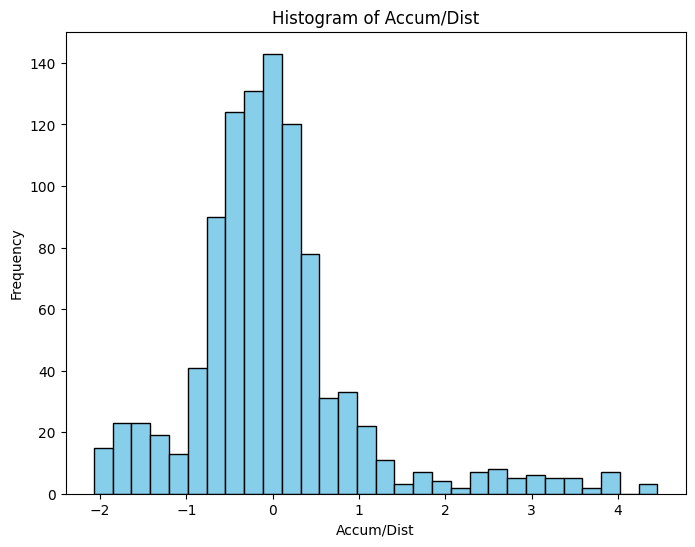

In [48]:
for column in df_copy.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df_copy[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Selecting our Predictor Variables from the df

In [49]:
X = df_copy.iloc[:,:9]

Making a df where 1 means tomorrows closing price is higher than todays,<br>
-1 means tomorrows closing price is lower than todays

In [50]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [62]:
np.unique(y, return_counts=True)

(array([-1,  1]), array([400, 581], dtype=int64))

splitting dataset into training and test data

In [51]:
split = int(0.7*len(df_copy))
training_X, testing_X, training_Y, testing_Y = X[:split], X[split:], y[:split], y[split:]

fitting LR model

In [64]:
model = LinearRegression()
model = model.fit (training_X, training_Y)
model_summary = pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))
print(model_summary)

            0         1
0         RSI  0.099429
1       EMA18  0.210501
2         OBV -0.246349
3         MFI -0.017058
4  Accum/Dist -0.077793


In [65]:
start_date = '2024-10-01'
end_date = datetime.today().strftime('%Y-%m-%d') # sets end date to todays date

Create a list containing the start and end dates

In [66]:
prediction_date = [start_date, end_date]

Use the list of dates for prediction

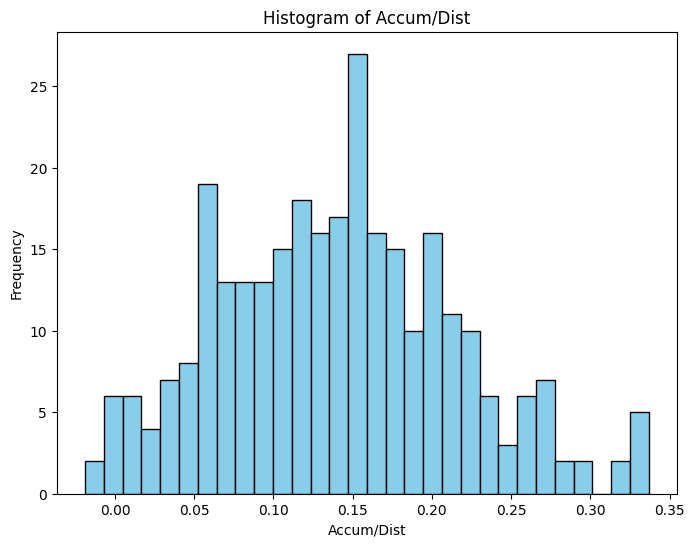

In [73]:
probability = model.predict(testing_X)
plt.figure(figsize=(8, 6))
plt.hist(probability, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

Testing model with our testing data

In [69]:
predicted = model.predict(testing_X)

Finding which dates that it predicted to buy<br>
Find the dates with predicted buy signals (Signal = 1)

In [70]:
predicted_labels = 1
buy_signal_dates = prediction_date[predicted_labels == 1]

Print the date(s) with buy signal(s)

In [71]:
print("\nDate(s) with Buy Signal(s):")
print(buy_signal_dates)


Date(s) with Buy Signal(s):
2024-11-03


Reporting model accuracy

In [72]:
print(metrics.classification_report(testing_Y, predicted))

ValueError: Classification metrics can't handle a mix of binary and continuous targets